<a href="https://colab.research.google.com/github/Siddharth131020/Machine-learning/blob/main/Linear_Regression_Boston_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
pip install scikit-learn==1.0.2

In [46]:
!pip install warn

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
#warnings.warn(msg,category=RutureWarning)

In [48]:
raw_boston=load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [49]:
print(raw_boston)
#curly brackets indicate dictionary

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [50]:
print(raw_boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [51]:
print(raw_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
len(raw_boston.target)


506

In [53]:
boston = pd.DataFrame(raw_boston.data, columns=raw_boston.feature_names)
dataset = pd.DataFrame(np.c_[boston['CHAS'], boston['CRIM'], boston['NOX'], boston['INDUS']],
                       columns=['CHAS', 'CRIM', 'NOX', 'INDUS'])

In [54]:
dataset

,CHAS,CRIM,NOX,INDUS
0,0.0,0.00632,0.538,2.31
1,0.0,0.02731,0.469,7.07
2,0.0,0.02729,0.469,7.07
3,0.0,0.03237,0.458,2.18
4,0.0,0.06905,0.458,2.18
...,...,...,...,...
501,0.0,0.06263,0.573,11.93
502,0.0,0.04527,0.573,11.93
503,0.0,0.06076,0.573,11.93
504,0.0,0.10959,0.573,11.93


In [55]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [56]:
X = dataset[:-100]
Y = raw_boston.target[:-100]
X_test = dataset[-100:]
Y_test = raw_boston.target[-100:]

In [57]:
print(X.shape, Y.shape, X_test.shape, Y_test.shape)

(406, 4) (406,) (100, 4) (100,)


In [58]:
u = np.mean(dataset, axis = 0)
std = np.std(dataset, axis = 0)
print(u.shape, std.shape)

(4,) (4,)


In [59]:
print(u, std)

CHAS      0.069170
CRIM      3.613524
NOX       0.554695
INDUS    11.136779
dtype: float64 CHAS     0.253743
CRIM     8.593041
NOX      0.115763
INDUS    6.853571
dtype: float64


In [60]:
X = (X - u)/std
X_test = (X_test - u)/std

In [61]:

X = np.array(X)
X_test = np.array(X_test)

In [62]:
X[:5, :]

array([[-0.27259857, -0.41978194, -0.14421743, -1.2879095 ],
       [-0.27259857, -0.41733926, -0.74026221, -0.59338101],
       [-0.27259857, -0.41734159, -0.74026221, -0.59338101],
       [-0.27259857, -0.41675042, -0.83528384, -1.30687771],
       [-0.27259857, -0.41248185, -0.83528384, -1.30687771]])

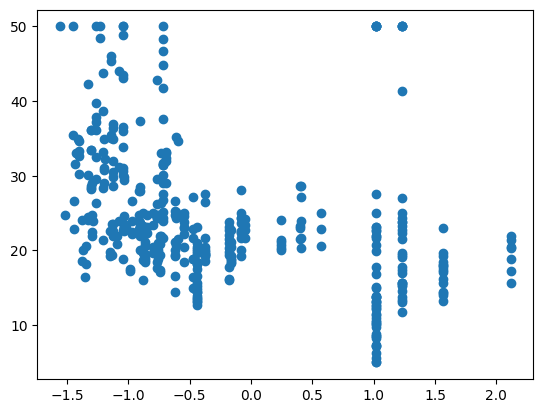

In [63]:
plt.scatter(X[:, 3], Y)
plt.show()

In [64]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones,X))

In [65]:
print(X[:5, :])

[[ 1.         -0.27259857 -0.41978194 -0.14421743 -1.2879095 ]
 [ 1.         -0.27259857 -0.41733926 -0.74026221 -0.59338101]
 [ 1.         -0.27259857 -0.41734159 -0.74026221 -0.59338101]
 [ 1.         -0.27259857 -0.41675042 -0.83528384 -1.30687771]
 [ 1.         -0.27259857 -0.41248185 -0.83528384 -1.30687771]]


In [66]:
def hypothesis(X, theta):
#     print(X.shape)
    y_ = 0
    n = X.shape[0]

    for i in range(n):
        y_ += theta[i]*X[i]
    return y_

In [67]:
def cost(X, Y, theta):
    m = X.shape[0]

    total_loss = 0

    for i in range(m):
        y_p = hypothesis(X[i], theta)

        y_gt = Y[i]

        total_loss+=(y_p - y_gt)**2

    return total_loss/m

In [68]:
def gradient(X, Y, theta):
    m, n = X.shape

    grad = np.zeros((n,))
#     print(grad[1])
    for j in range(n):
        for i in range(m):
            y_p = hypothesis(X[i], theta)

            y_gt = Y[i]

            grad[j] += (y_p - y_gt)*X[i][j]

    return grad/m

In [69]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    m, n = X.shape
    theta = np.zeros((n,))
    cost_epoch = []

    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)

        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]

    return theta, cost_epoch

In [70]:
theta, cost_epoch = gradient_descent(X, Y, learning_rate=0.01, epochs=1000)


In [71]:
cost_epoch[-10:]


[66.74254503521864,
 66.74253647094885,
 66.74252794975824,
 66.74251947139213,
 66.74251103559828,
 66.742502642126,
 66.74249429072697,
 66.74248598115481,
 66.74247771316507,
 66.74246948651518]

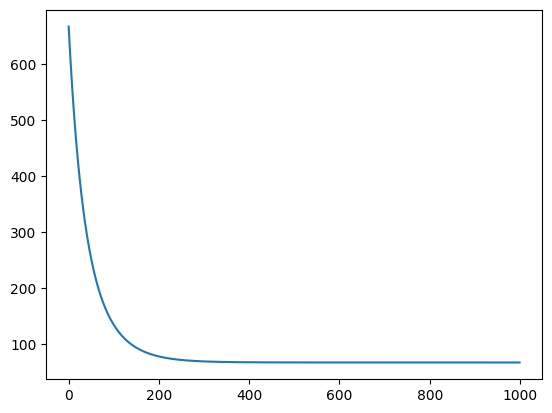

In [72]:
plt.plot(cost_epoch)


In [73]:
theta

array([22.82687855,  1.65751247, -2.01490518, -0.4959466 , -3.0897562 ])

In [74]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)

    score = (1 - num/den)

    return score

In [75]:
X_test.shape


(100, 4)

In [76]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:4, :])

[[ 1.         -0.27259857  1.99029374  0.90102051  1.01599907]
 [ 1.         -0.27259857  0.97027072  0.90102051  1.01599907]
 [ 1.         -0.27259857  0.4410972   0.36544404  1.01599907]
 [ 1.         -0.27259857  1.25971423  0.36544404  1.01599907]]


In [77]:
X_test.shape


(100, 5)

In [78]:
y_pred_test = []

for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i], theta)
    y_pred_test.append(pred)

y_pred_test = np.array(y_pred_test)

In [79]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i], Y_test[i])


14.778742372712406 11.9
16.83399203856627 27.9
18.165843844305698 17.2
16.51640815024869 27.5
7.911540594525176 15.0
16.607292997025674 17.2
15.491092955455796 17.9
13.18267412276728 16.3
8.764044554450932 7.0
15.310119639616223 7.2
17.010200891091603 7.5
13.468036677077523 10.4
2.3082638311526753 8.8
16.61377313005177 8.4
16.783748427855265 16.7
17.736869258679725 14.2
17.004010699975826 20.8
18.175895296273772 13.4
17.896024201222474 11.7
15.83167579205701 8.3
17.08587348811043 10.2
10.719614193777517 10.9
17.82316772135997 11.0
17.360822718320946 9.5
17.966366165063103 14.5
17.598191088015064 14.1
18.446602070602342 16.1
18.09629910351347 14.3
16.14252579250913 11.7
16.67238000330998 13.4
15.907878056891805 9.6
15.730516606679958 8.7
16.082027117008593 8.4
17.08735749371376 12.8
14.118717462561479 10.5
17.009146346545382 17.1
17.960625810167983 18.4
16.952317524396594 15.4
16.287385602063505 10.8
16.78694743399944 11.8
17.8148489545404 14.9
16.96209303848878 12.6
17.217459517814092 

In [80]:
score = R2_score(Y_test, y_pred_test)


In [81]:
score


0.15004317140490586

In [82]:
from sklearn import metrics

In [83]:
print("MAE distance:", metrics.mean_absolute_error(Y_test, y_pred_test))
print("MSE distance:", metrics.mean_squared_error(Y_test, y_pred_test))
print("RMSE distance:", np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)))

MAE distance: 3.786002682658201
MSE distance: 21.767206539861245
RMSE distance: 4.6655338965504525


In [84]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [85]:
def cost(X, Y, theta):
    m = X.shape[0]

    total_loss = 0

    y_p = hypothesis(X, theta)

    total_loss = np.sum((y_p - Y)**2)

    return total_loss/m

In [86]:
def gradient(X, Y, theta):

    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]

In [87]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 1000):
    m, n = X.shape
    theta = np.zeros((n,))
    cost_epoch = []

    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)

        theta = theta - learning_rate*grad

    return theta, cost_epoch

In [88]:
theta, cost_epoch = gradient_descent(X, Y, learning_rate=0.01, epochs=1000)


In [89]:
cost_epoch[-10:]


[66.74254503521853,
 66.7425364709488,
 66.74252794975821,
 66.74251947139219,
 66.74251103559826,
 66.74250264212598,
 66.74249429072697,
 66.74248598115479,
 66.74247771316504,
 66.74246948651522]

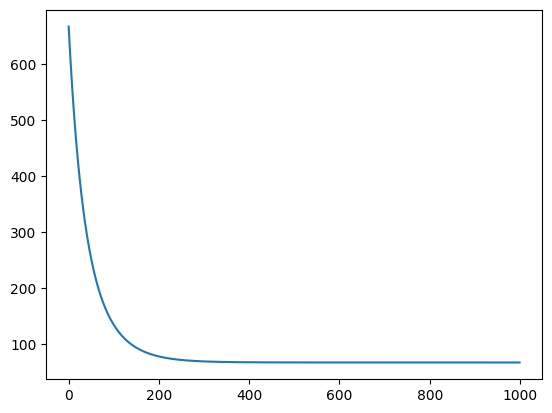

In [90]:
plt.plot(cost_epoch)
